## Autoevaluación 3

###  Matriz de Proyección

#### Pregunta 1

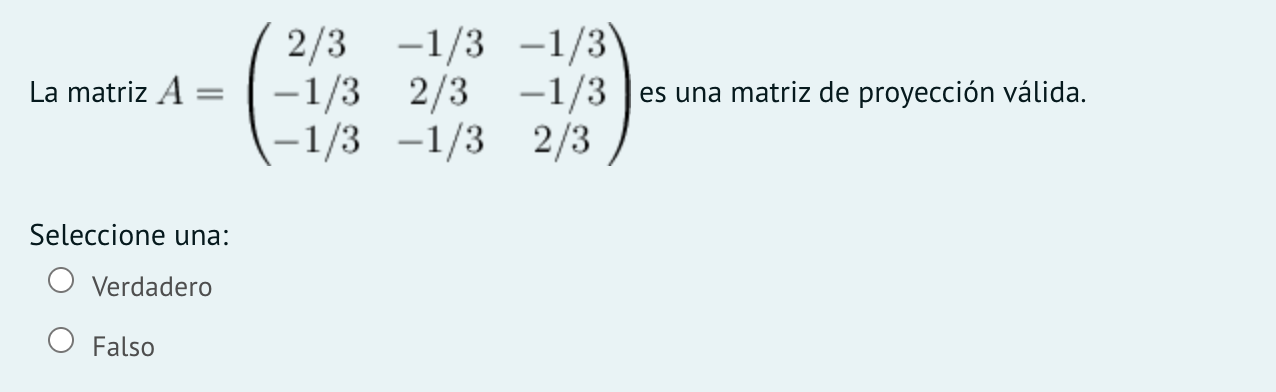

Una matriz de proyección A cumple:

A^2 = A

Esto significa que la matriz es idempotente, es decir, aplicar la transformación dos veces equivale a aplicarla una sola vez.

In [1]:
import numpy as np

def es_matriz_de_proyeccion(matriz, tolerancia=1e-10):
    """
    Verifica si una matriz cuadrada es una matriz de proyección válida (idempotente).
    Es decir, si cumple A^2 = A.
    
    :param matriz: Matriz cuadrada como lista de listas o array de NumPy.
    :param tolerancia: Tolerancia numérica para comparación (por defecto 1e-10).
    :return: True si es matriz de proyección, False en caso contrario.
    """
    A = np.array(matriz, dtype=np.float64)

    # Verifica si la matriz es cuadrada
    if A.shape[0] != A.shape[1]:
        return False

    # Calcular A^2
    A2 = A @ A

    # Comparar A^2 con A
    return np.allclose(A2, A, atol=tolerancia)

In [2]:
# 🔹 Probar la función con el ejemplo anterior
A = [
    [2/3, -1/3, -1/3],
    [-1/3, 2/3, -1/3],
    [-1/3, -1/3, 2/3]
]

es_matriz_de_proyeccion(A)

True

#### Pregunta 2

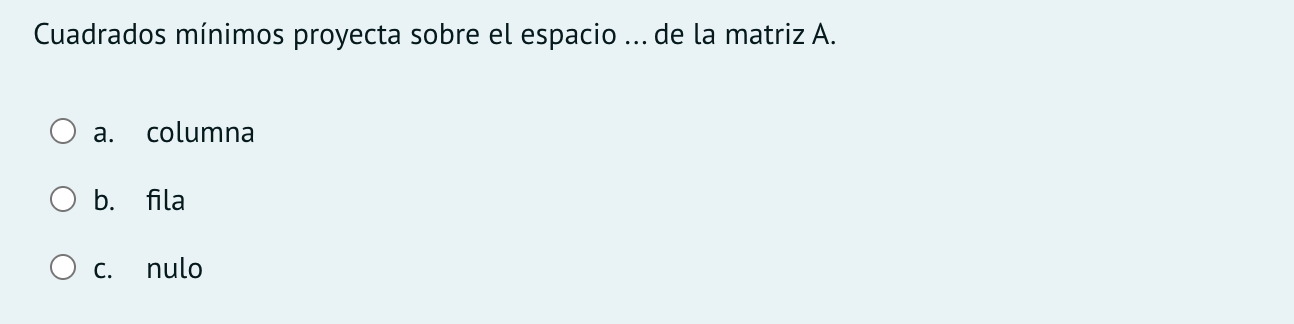

📌 Cuadrados mínimos y espacio de proyección

En el método de cuadrados mínimos, se busca la mejor aproximación x que minimiza el error ||Ax - b||², cuando el sistema Ax = b no tiene solución exacta.

🔹 Esta solución proyecta el vector b sobre el **Espacio columna** de la matriz A.

✅ Respuesta correcta: **Columna**

### Autovalores y Autovectores

#### Pregunta 3

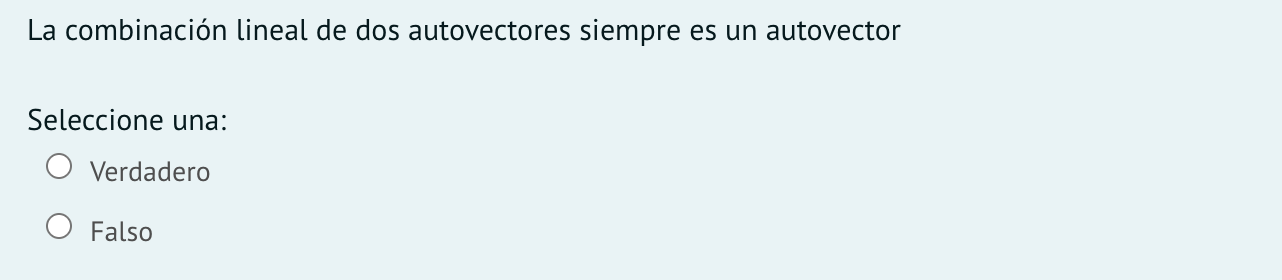

Una combinación lineal de dos autovectores **no siempre es un autovector**, a menos que ambos autovectores correspondan al **mismo autovalor**.

Si los autovalores son distintos, entonces la combinación lineal **no cumple** con la condición de ser un múltiplo del vector original, por lo tanto **no es un autovector**.

✅ Solo es válida la combinación cuando los autovectores pertenecen al mismo autovalor.

#### Pregunta 4

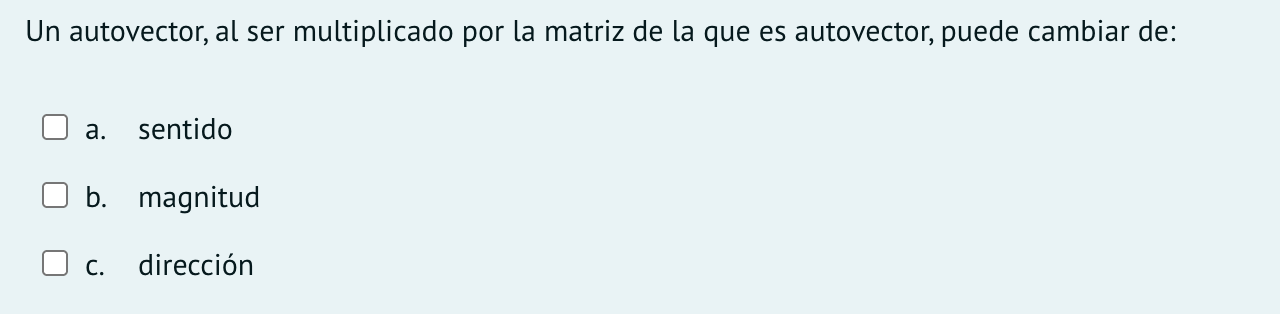

Cuando un autovector `v` es multiplicado por la matriz `A` de la que es autovector, se cumple:

**A * v = λ * v**

Esto significa que:

- ✅ **Puede cambiar de magnitud**: se escala por el valor absoluto de λ.
- ✅ **Puede cambiar de sentido**: si λ es negativo, apunta en sentido opuesto.
- ❌ **No cambia de dirección**: siempre permanece en la misma recta (o eje) que el vector original.

#### Pregunta 5

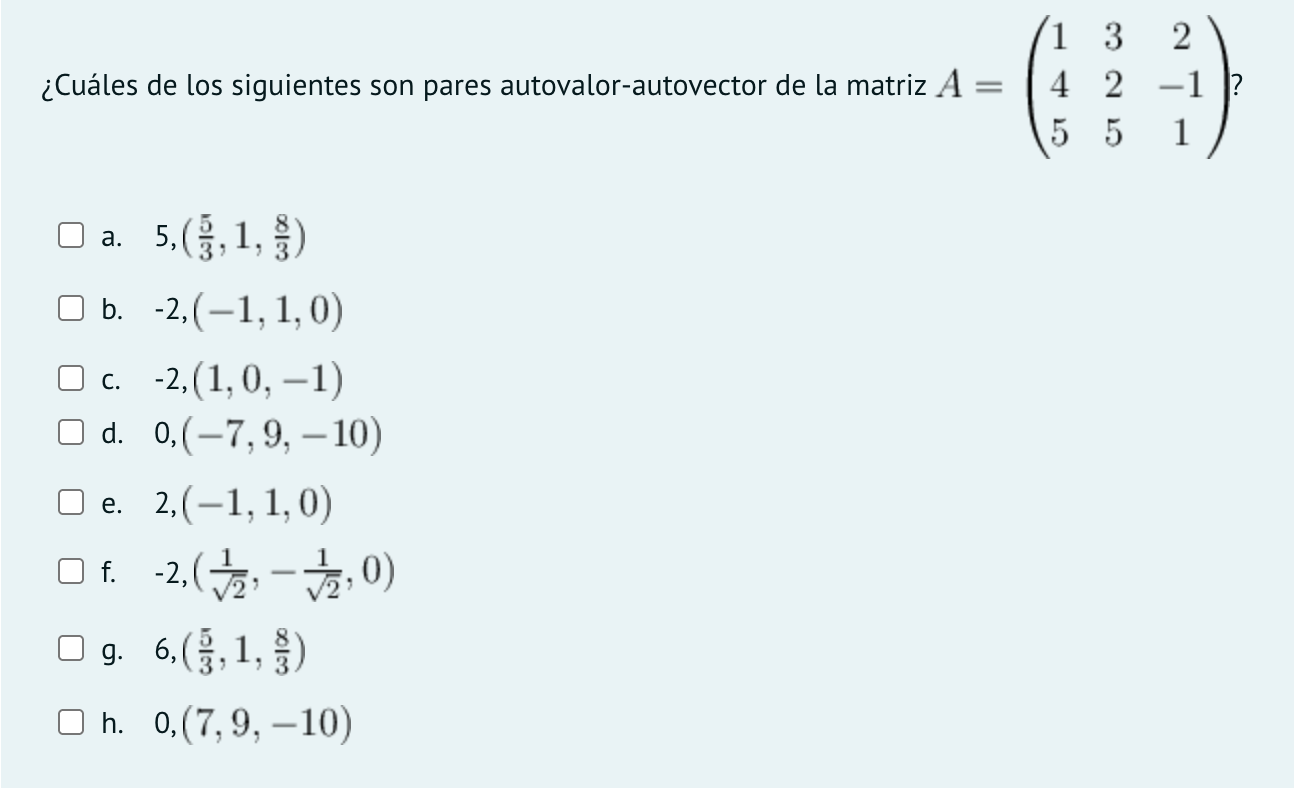

Dado un par (lambda, v), queremos saber si v es un autovector de una matriz A con autovalor lambda.

Para eso, simplemente calculamos:

A * v  y lo comparamos con  lambda * v

Si ambos vectores son iguales (o proporcionales), entonces el par es válido.

In [5]:
import numpy as np

def verificar_autopar(matriz, autovalor, autovector, tolerancia=1e-8):
    A = np.array(matriz, dtype=np.float64)
    v = np.array(autovector, dtype=np.float64)
    izquierda = A @ v
    derecha = autovalor * v
    return np.allclose(izquierda, derecha, atol=tolerancia)

In [6]:
# 🔹 Matriz A del enunciado
A = [
    [1, 3, 2],
    [4, 2, -1],
    [5, 5, 1]
]

# Pares de autovalor-autovector a probar (de la imagen)
pares_a_probar = {
    "a": (5, [5/3, 1, 8/3]),
    "b": (-2, [-1, 1, 0]),
    "c": (-2, [1, 0, -1]),
    "d": (0, [-7, 9, -10]),
    "e": (2, [-1, 1, 0]),
    "f": (-2, [1/np.sqrt(2), -1/np.sqrt(2), 0]),
    "g": (6, [5/3, 1, 8/3]),
    "h": (0, [7, 9, -10])
}

# Verificar cada par
resultados = {letra: verificar_autopar(A, val, vec) for letra, (val, vec) in pares_a_probar.items()}
resultados

{'a': False,
 'b': True,
 'c': False,
 'd': True,
 'e': False,
 'f': True,
 'g': True,
 'h': False}

#### Pregunta 6

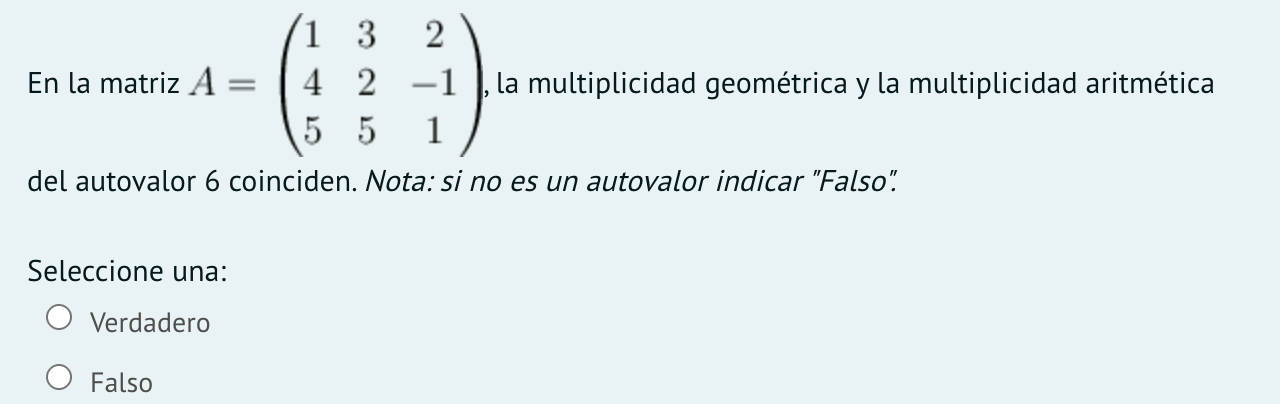

In [19]:
def verificar_multiplicidades(matriz, autovalor, tolerancia=1e-8):
    """
    Verifica si el número dado es un autovalor de la matriz y compara su multiplicidad aritmética y geométrica.

    Parámetros:
    - matriz: matriz cuadrada (lista de listas o array numpy)
    - autovalor: valor a verificar
    - tolerancia: margen de error numérico

    Retorna:
    - es_autovalor: True si es autovalor, False si no
    - multiplicidad_aritmetica: cantidad de veces que aparece como raíz del polinomio característico
    - multiplicidad_geometrica: dimensión del núcleo de (A - autovalor * I)
    - coinciden: True si ambas multiplicidades son iguales
    """
    A = np.array(matriz, dtype=np.float64)
    valores_propios, _ = np.linalg.eig(A)

    es_autovalor = np.any(np.isclose(valores_propios, autovalor, atol=tolerancia))

    if es_autovalor:
        multiplicidad_aritmetica = int(np.sum(np.isclose(valores_propios, autovalor, atol=tolerancia)))
        matriz_reducida = A - autovalor * np.identity(A.shape[0])
        rango = np.linalg.matrix_rank(matriz_reducida)
        multiplicidad_geometrica = A.shape[0] - rango
        coinciden = multiplicidad_aritmetica == multiplicidad_geometrica
    else:
        multiplicidad_aritmetica = 0
        multiplicidad_geometrica = 0
        coinciden = False

    return {
        "es_autovalor": bool(es_autovalor),
        "autovalor": int(autovalor),
        "multiplicidad_aritmetica": int(multiplicidad_aritmetica),
        "multiplicidad_geometrica": int(multiplicidad_geometrica),
        "coinciden_las_multiplicidades": bool(coinciden)
    }

In [20]:
# Probar con la matriz y autovalor 6
matriz_ejemplo = [
    [1, 3, 2],
    [4, 2, -1],
    [5, 5, 1]
]
verificar_multiplicidades(matriz_ejemplo, autovalor=6)

{'es_autovalor': True,
 'autovalor': 6,
 'multiplicidad_aritmetica': 1,
 'multiplicidad_geometrica': 1,
 'coinciden_las_multiplicidades': True}

#### Pregunta 7

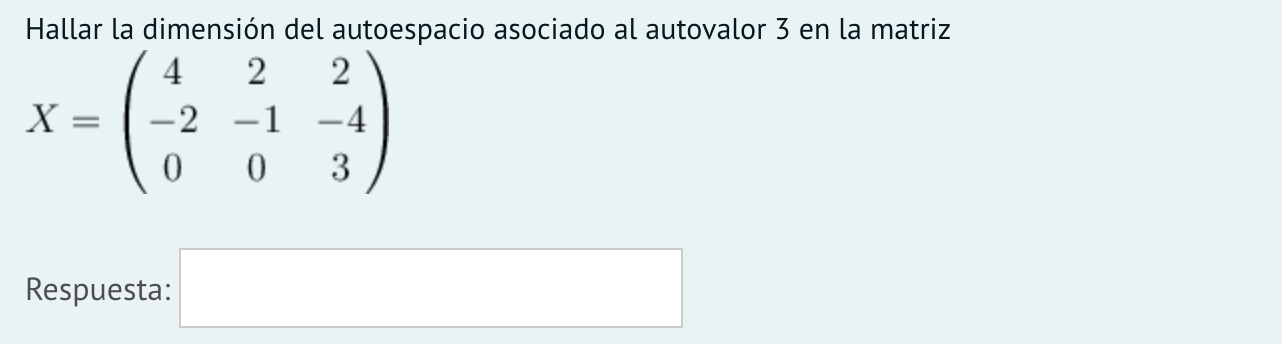

In [13]:
def dimension_autoespacio(matriz, autovalor, tolerancia=1e-8):
    """
    Calcula la dimensión del autoespacio asociado a un autovalor dado.
    
    Parámetros:
    - matriz: matriz cuadrada (lista de listas o array NumPy)
    - autovalor: escalar a verificar
    - tolerancia: margen para errores numéricos
    
    Retorna:
    - dimensión del autoespacio (multiplicidad geométrica)
    """
    A = np.array(matriz, dtype=np.float64)
    n = A.shape[0]
    A_lambda = A - autovalor * np.identity(n)
    rango = np.linalg.matrix_rank(A_lambda, tol=tolerancia)
    return int(n - rango)

In [14]:
# Ejemplo con la matriz X y autovalor 3
matriz_X = [
    [4, 2, 2],
    [-2, -1, -4],
    [0, 0, 3]
]

dimension_autoespacio(matriz_X, autovalor=3)

2

#### Pregunta 8

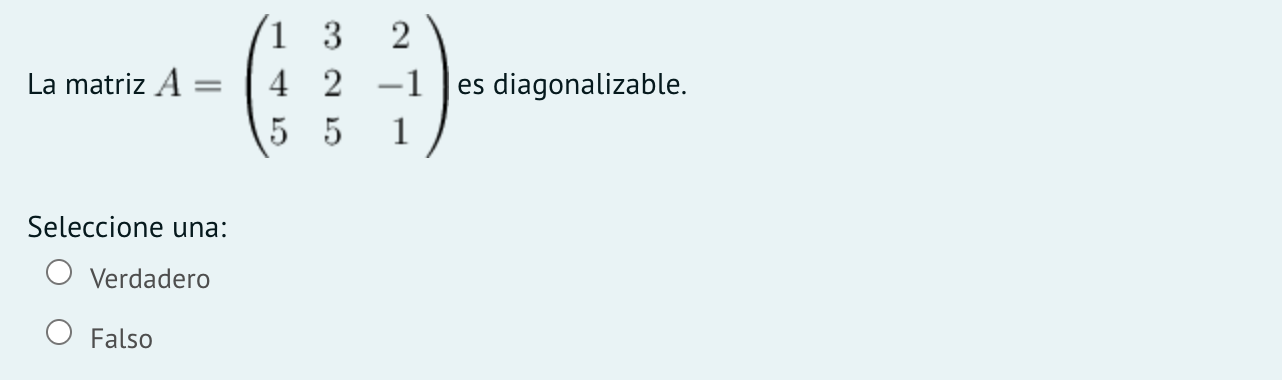

Una matriz es diagonalizable si la suma de las dimensiones de los autoespacios (multiplicidad geométrica)
es igual al tamaño de la matriz (es decir, si hay una base de autovectores).

In [23]:
def es_diagonalizable(matriz, tolerancia=1e-8):
    """
    Verifica si una matriz cuadrada es diagonalizable.
    Una matriz es diagonalizable si la suma de las dimensiones de los autoespacios (multiplicidad geométrica)
    es igual al tamaño de la matriz (es decir, si hay una base de autovectores).

    Retorna: True o False
    """
    A = np.array(matriz, dtype=np.float64)
    n = A.shape[0]
    valores_propios, _ = np.linalg.eig(A)
    
    autoespacios = 0
    unicos_autovalores = np.unique(np.round(valores_propios, decimals=8))
    
    for val in unicos_autovalores:
        A_lambda = A - val * np.identity(n)
        rango = np.linalg.matrix_rank(A_lambda, tol=tolerancia)
        multiplicidad_geometrica = n - rango
        autoespacios += multiplicidad_geometrica

    return bool(autoespacios == n)

In [24]:
# Aplicamos la función a la matriz del ejercicio
A = [
    [1, 3, 2],
    [4, 2, -1],
    [5, 5, 1]
]

es_diagonalizable(A)

True